In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression
from termcolor import colored

# Book Sales Data

In [93]:
df = pd.read_csv('data/book_sales.csv', index_col= 'Date', parse_dates = True).drop('Paperback', axis=1)
df.head(3)

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172


In [94]:
# Time-step features - ex: time dummy
df['Time_dummy'] = np.arange(len(df.index))
df.head(3)

,Hardcover,Time_dummy
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2


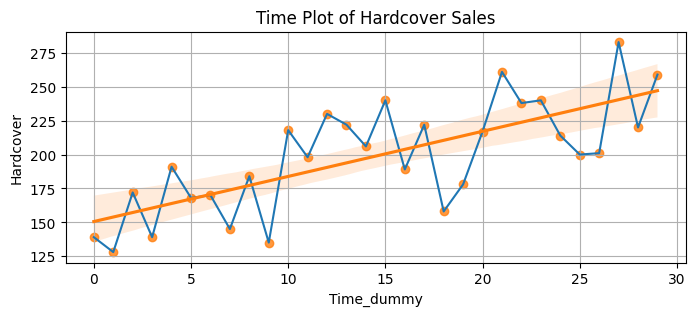

In [95]:
fig, ax = plt.subplots(figsize = (8,3))
ax.plot('Time_dummy', 'Hardcover', data=df)
ax = sns.regplot(x='Time_dummy', y='Hardcover', data = df)
ax.set_title('Time Plot of Hardcover Sales')
ax.grid()

In [96]:
# Lag features
df['Lag_1'] = df['Hardcover'].shift(1)
df = df.reindex(columns = ['Hardcover', 'Lag_1'])
df.head(3)

,Hardcover,Lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139.0
2000-04-03,172,128.0


Text(0.5, 1.0, ' Plot of Lag_1 vs Hardcover')

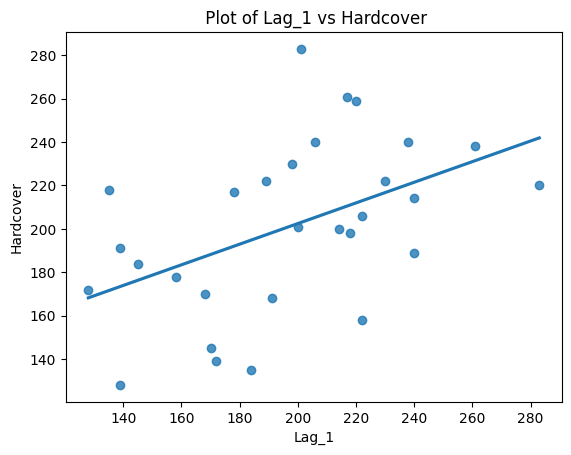

In [97]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Hardcover', data = df, ci=None)
ax.set_title(' Plot of Lag_1 vs Hardcover')

We can see that previous day sales i.e. `Lag_1` is correlated with current day's sales i.e. `Hardcover`. This means it is a good feature to be included.

# Traffic Data

In [98]:
df = pd.read_csv('data/tunnel.csv', index_col= 'Day', parse_dates = True)
df.head(3)

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795


In [99]:
df.index

DatetimeIndex(['2003-11-01', '2003-11-02', '2003-11-03', '2003-11-04',
               '2003-11-05', '2003-11-06', '2003-11-07', '2003-11-08',
               '2003-11-09', '2003-11-10',
               ...
               '2005-11-07', '2005-11-08', '2005-11-09', '2005-11-10',
               '2005-11-11', '2005-11-12', '2005-11-13', '2005-11-14',
               '2005-11-15', '2005-11-16'],
              dtype='datetime64[ns]', name='Day', length=747, freq=None)

In [100]:
df = df.to_period()
df.head(3)

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795


In [101]:
df.index

PeriodIndex(['2003-11-01', '2003-11-02', '2003-11-03', '2003-11-04',
             '2003-11-05', '2003-11-06', '2003-11-07', '2003-11-08',
             '2003-11-09', '2003-11-10',
             ...
             '2005-11-07', '2005-11-08', '2005-11-09', '2005-11-10',
             '2005-11-11', '2005-11-12', '2005-11-13', '2005-11-14',
             '2005-11-15', '2005-11-16'],
            dtype='period[D]', name='Day', length=747)

In [102]:
# Time-step features
# Since we know that no dates are missing in the data, we make time_dummy simply as below:
df['Time_dummy'] = np.arange(len(df.index))
df.head(3)

,NumVehicles,Time_dummy
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2


In [103]:
# Fit a linear regression model on Time-step features
X = df.loc[:, ['Time_dummy']]
y = df.loc[:,  'NumVehicles']
print(X.shape, y.shape)
print('X:\n', X.head(3), '\n\ny: \n', y.head(3))
# Model
lr = LinearRegression()
lr.fit(X,y)
print(colored(f'\nLinear Regression score: {lr.score(X, y)} ', 'red', attrs=['bold']))

# Predictions
y_pred = lr.predict(X)
# make preds as a dataframe
y_pred = pd.Series(y_pred, index = X.index)
print('\n\nPredictions:\n', y_pred.head(3))

(747, 1) (747,)
X:
             Time_dummy
Day                   
2003-11-01           0
2003-11-02           1
2003-11-03           2 

y: 
 Day
2003-11-01    103536
2003-11-02     92051
2003-11-03    100795
Freq: D, Name: NumVehicles, dtype: int64

Linear Regression score: 0.15188884751345133 


Predictions:
 Day
2003-11-01    98176.206344
2003-11-02    98198.703794
2003-11-03    98221.201243
Freq: D, dtype: float64


In [104]:
print(colored(f'Vehicles = {str(lr.coef_[0])} x Time_dummy + {str(lr.intercept_)}', 'red', attrs=['bold']))

Vehicles = 22.49744953347821 x Time_dummy + 98176.20634409295


Text(0.5, 1.0, 'Time Plot for Tunnel Traffic (Linear Regression)')

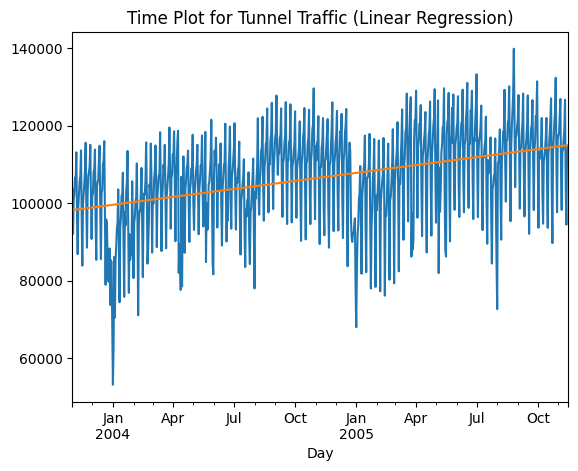

In [105]:
fig, ax = plt.subplots()
ax = y.plot()
ax = y_pred.plot()
ax.set_title('Time Plot for Tunnel Traffic (Linear Regression)')

In [106]:
# Lag feature
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head(3)

,NumVehicles,Time_dummy,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0


In [107]:
df.dropna(inplace=True)
df.head(3)

,NumVehicles,Time_dummy,Lag_1
Day,,,
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0


In [108]:
# Fit a linear regression model on Lag features
X = df.loc[:, ['Lag_1']]
y = df.loc[:,  'NumVehicles']
print(X.shape, y.shape)
print('X:\n', X.head(3), '\n\ny: \n', y.head(3))
# Model
lr = LinearRegression()
lr.fit(X,y)
print(colored(f'\nLinear Regression score: {lr.score(X, y)} ', 'red', attrs=['bold']))

# Predictions
y_pred = lr.predict(X)
# make preds as a dataframe
y_pred = pd.Series(y_pred, index = X.index)
print('\n\nPredictions:\n', y_pred.head(3))

(746, 1) (746,)
X:
                Lag_1
Day                 
2003-11-02  103536.0
2003-11-03   92051.0
2003-11-04  100795.0 

y: 
 Day
2003-11-02     92051
2003-11-03    100795
2003-11-04    102352
Freq: D, Name: NumVehicles, dtype: int64

Linear Regression score: 0.28391328985412134 


Predictions:
 Day
2003-11-02    104961.799284
2003-11-03     98840.684037
2003-11-04    103500.939302
Freq: D, dtype: float64


`lr.score` is higher for model trained with **Lag-features** as compared to **Time-step** features

In [112]:
print(colored(f'Vehicles = {str(lr.coef_[0])} x Lag_1 + {str(lr.intercept_)}', 'red', attrs=['bold']))

Vehicles = 0.5329660641208311 x Lag_1 + 49780.624869069565


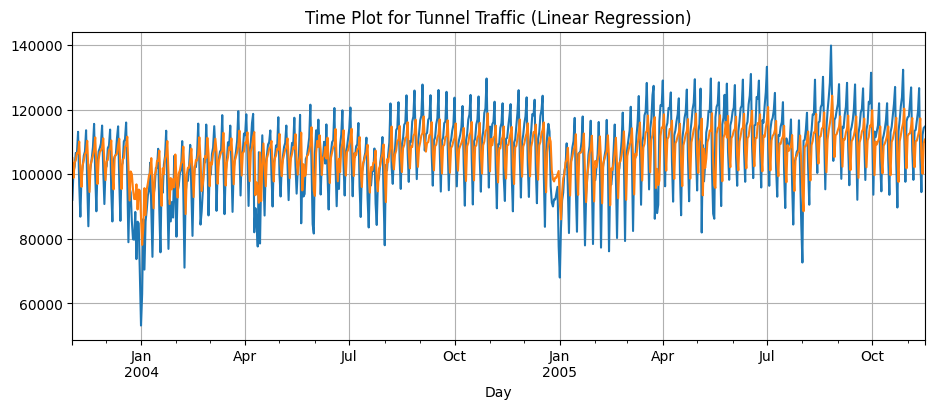

In [114]:
fig, ax = plt.subplots(figsize=(11,4))
ax = y.plot()
ax = y_pred.plot()
ax.set_title('Time Plot for Tunnel Traffic (Linear Regression)')
ax.grid()

Text(0.5, 1.0, 'Time Plot for Tunnel Traffic (Linear Regression)')

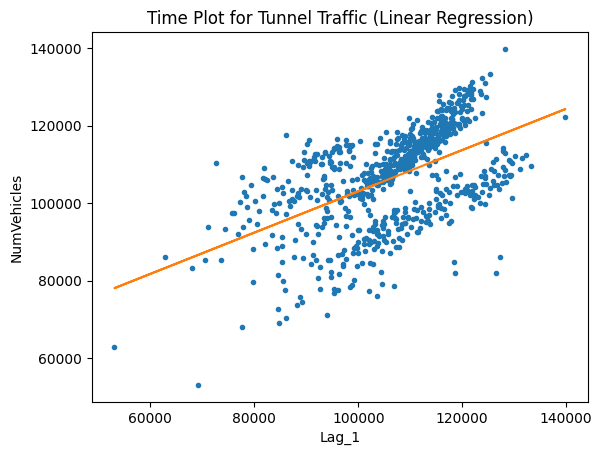

In [110]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.')
ax.plot(X['Lag_1'], y_pred)
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Time Plot for Tunnel Traffic (Linear Regression)')
